# Data Overview

#### source : 
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/download

#### Context
This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

#### Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not    recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

#### Acknowledgements
Anonymous but real source

#### Inspiration
I look forward to come quality NLP! There is also some great opportunities for feature engineering, and multivariate analysis.

# Data Goals: 
- untuk memprediksi apakah customer akan merekomendasikan produk atau tidak (y/n --> categorical). ini menjadi penting mengingat asumsi customer yang sudah berbelanja dengan hasil akan merekomendasikan produk, dianggap memiliki nilai feedback positive terhadap produk yang kita jual dipasaran. dengan nilai rekomendasi kita dapat beranggapan bahwa customer kemungkinan akan membeli lagi atau merekomendasikan ke orang lain via mouth to mouth. 
- memprediksi sentiment analisis berdasarkan komentar yang diisi customer dikolom review 
- untuk menganalisa kekuatan pasar dan trend berdasarkan segmentasi produk pakaian wanita. 
- survey trend pasar untuk produk ecommerce clothing wanita berdasarkan review customer (diproses meggunakan NLP).

# 1. Data Extraction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('womens-clothing.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
data[data['Age']>89]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
659,659,252,93,Amazing suit!,"This is by far the cutest, most glamorous one ...",5,1,3,Initmates,Intimate,Swim
5901,5901,1094,90,Gorgeous,Absolutely beautiful dress. i'm 5'11 and this ...,5,1,0,General Petite,Dresses,Dresses
6543,6543,1095,94,NaN,Flattering! i love how it looks like a maxi dr...,4,1,0,General,Dresses,Dresses
8327,8327,1078,99,Beachy and boho!,I love the weight of the material; sometimes c...,5,1,1,General,Dresses,Dresses
9513,9513,871,91,NaN,"From the website picture (in particular, the g...",5,1,15,General,Tops,Knits
10617,10617,1028,91,Pajama jeans,"I love the coh fleetwood jeans, and since i wa...",2,0,3,General,Bottoms,Jeans
10686,10686,1002,91,NaN,NaN,5,1,0,General,Bottoms,Skirts
11545,11545,949,99,NaN,"Great quality, i didn't expect the neck to be ...",4,1,4,General,Tops,Sweaters
12631,12631,1081,90,Disappointed,I was really looking forward to this dress. i ...,2,0,15,General,Dresses,Dresses
14997,14997,1025,92,The only jeans you'll ever wear!,It's hard to tell how jeans will fit when shop...,5,1,2,General,Bottoms,Jeans


In [6]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [7]:
data.describe(include='O')

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


In [8]:
data.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

# 2. Data Cleaning

In [9]:
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### Dropna : 

#### Dropna Review Text: 
feature 'Review Text' total isNaN == 845. the only feature can get hint to fillna 'Review Text' is 'title', but the title isNaN too and other features not relatable to fill this. so we just need to delete it

In [10]:
(data['Recommended IND']==0).sum()

4172

In [11]:
# Review Text == NaN & Recommended ID == 0
percentage_recommended_0_to_delete = len(data[(data['Review Text'].isnull())&(data['Recommended IND']==0)])
percentage_recommended_0_to_delete/(data['Recommended IND']==0).sum()

0.017018216682646213

In [12]:
#recommended 0 will be delete for 0.01%
data.dropna(subset=['Review Text'], inplace=True)


#### Dropna Division Name, Department Name, Class Name: 
'Division Name' is part of 'Department Name', 'Department Name' is tiny part of 'Class Name'. since the 'Class Name' isNaN 14 over the 20.000 data, and contains recommended IND ==1, we just need to delete it

In [13]:
data.dropna(subset=['Division Name', 'Department Name', 'Class Name'], inplace=True)

### Fillna : 
#### Processing into NLP

- fillna using NLP:
there's no relatable feature to fill NaN by mode or anything, there's only one way to get the relatable column to fill other NaN, is by extracting meaningfull words based on columns 'Review Text' into NLP

In [14]:
data['Review length'] = data['Review Text'].apply(lambda x:len(x))

In [15]:
import re

In [16]:
def clean_text(x):
    letter_only=re.sub("[^a-zA-Z]", " ", x)
    return ' '.join(letter_only.split()).lower()

In [17]:
data['Clean Review']=data['Review Text'].apply(clean_text)

In [18]:
data['Clean Review Length']=data['Clean Review'].apply(lambda x : len(x))

- Find Meaningfull words in every document to fill 'Title'

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [20]:
count_vectorizer_transformer=CountVectorizer().fit(data['Clean Review'])
count_vectorizer_res=count_vectorizer_transformer.transform(data['Clean Review'])
tf_idf_transformer=TfidfTransformer().fit(count_vectorizer_res)
tf_idf_res=tf_idf_transformer.transform(count_vectorizer_res)
df_tf_idf = pd.DataFrame(tf_idf_res.todense(),columns=count_vectorizer_transformer.get_feature_names())

In [21]:
# Find 3 Meaningfull Words:
meaningfull_words= []
for item in range(len(data)):
    words = list(df_tf_idf.iloc[item].sort_values(ascending=False).head(3).index)
    meaningfull_words.append(words)
data['Meaningfull Words']=meaningfull_words

In [22]:
# Meaningfull Words into string:
def Meaningfull_str(x):
    for item in x:
        return ' '.join(str(item) for item in x)

In [23]:
data['Meaningfull Words Str']=data['Meaningfull Words'].apply(Meaningfull_str)

In [24]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review length,Clean Review,Clean Review Length,Meaningfull Words,Meaningfull Words Str
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,absolutely wonderful silky and sexy and comfor...,51,"[silky, sexy, wonderful]",silky sexy wonderful
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,love this dress it s sooo pretty i happened to...,285,"[bc, petite, sooo]",bc petite sooo
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,i had such high hopes for this dress and reall...,485,"[net, half, layer]",net half layer
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,i love love love this jumpsuit it s fun flirty...,116,"[flirty, love, fabulous]",flirty love fabulous
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,this shirt is very flattering to all due to th...,187,"[shirt, adjustable, sleeveless]",shirt adjustable sleeveless


#### Fillna Title using Meaningfull Words

In [25]:
data['Title'].fillna(data['Meaningfull Words Str'], inplace=True)

In [26]:
data.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Review length              0
Clean Review               0
Clean Review Length        0
Meaningfull Words          0
Meaningfull Words Str      0
dtype: int64

In [27]:
#nanti dulu, lihat modellingnya dulu
#data['Age'] = data['Age'].apply(outlier('Age'), axis=1)

# 3. Exploratory Data Analysis

- to see the age of the reviewer by rating, and see if they would recommend the product or not

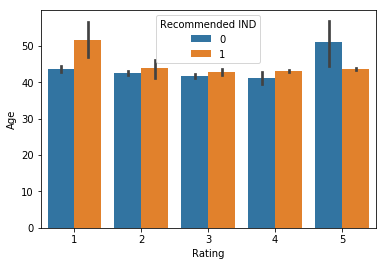

In [28]:
sns.barplot(data=data, x='Rating', y='Age', hue='Recommended IND')

- Correlation between the columns:

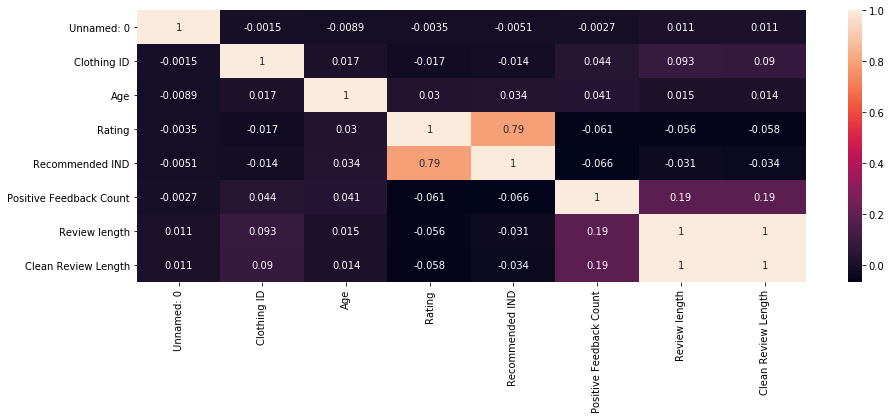

In [43]:
plt,ax=plt.subplots(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, ax=ax)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


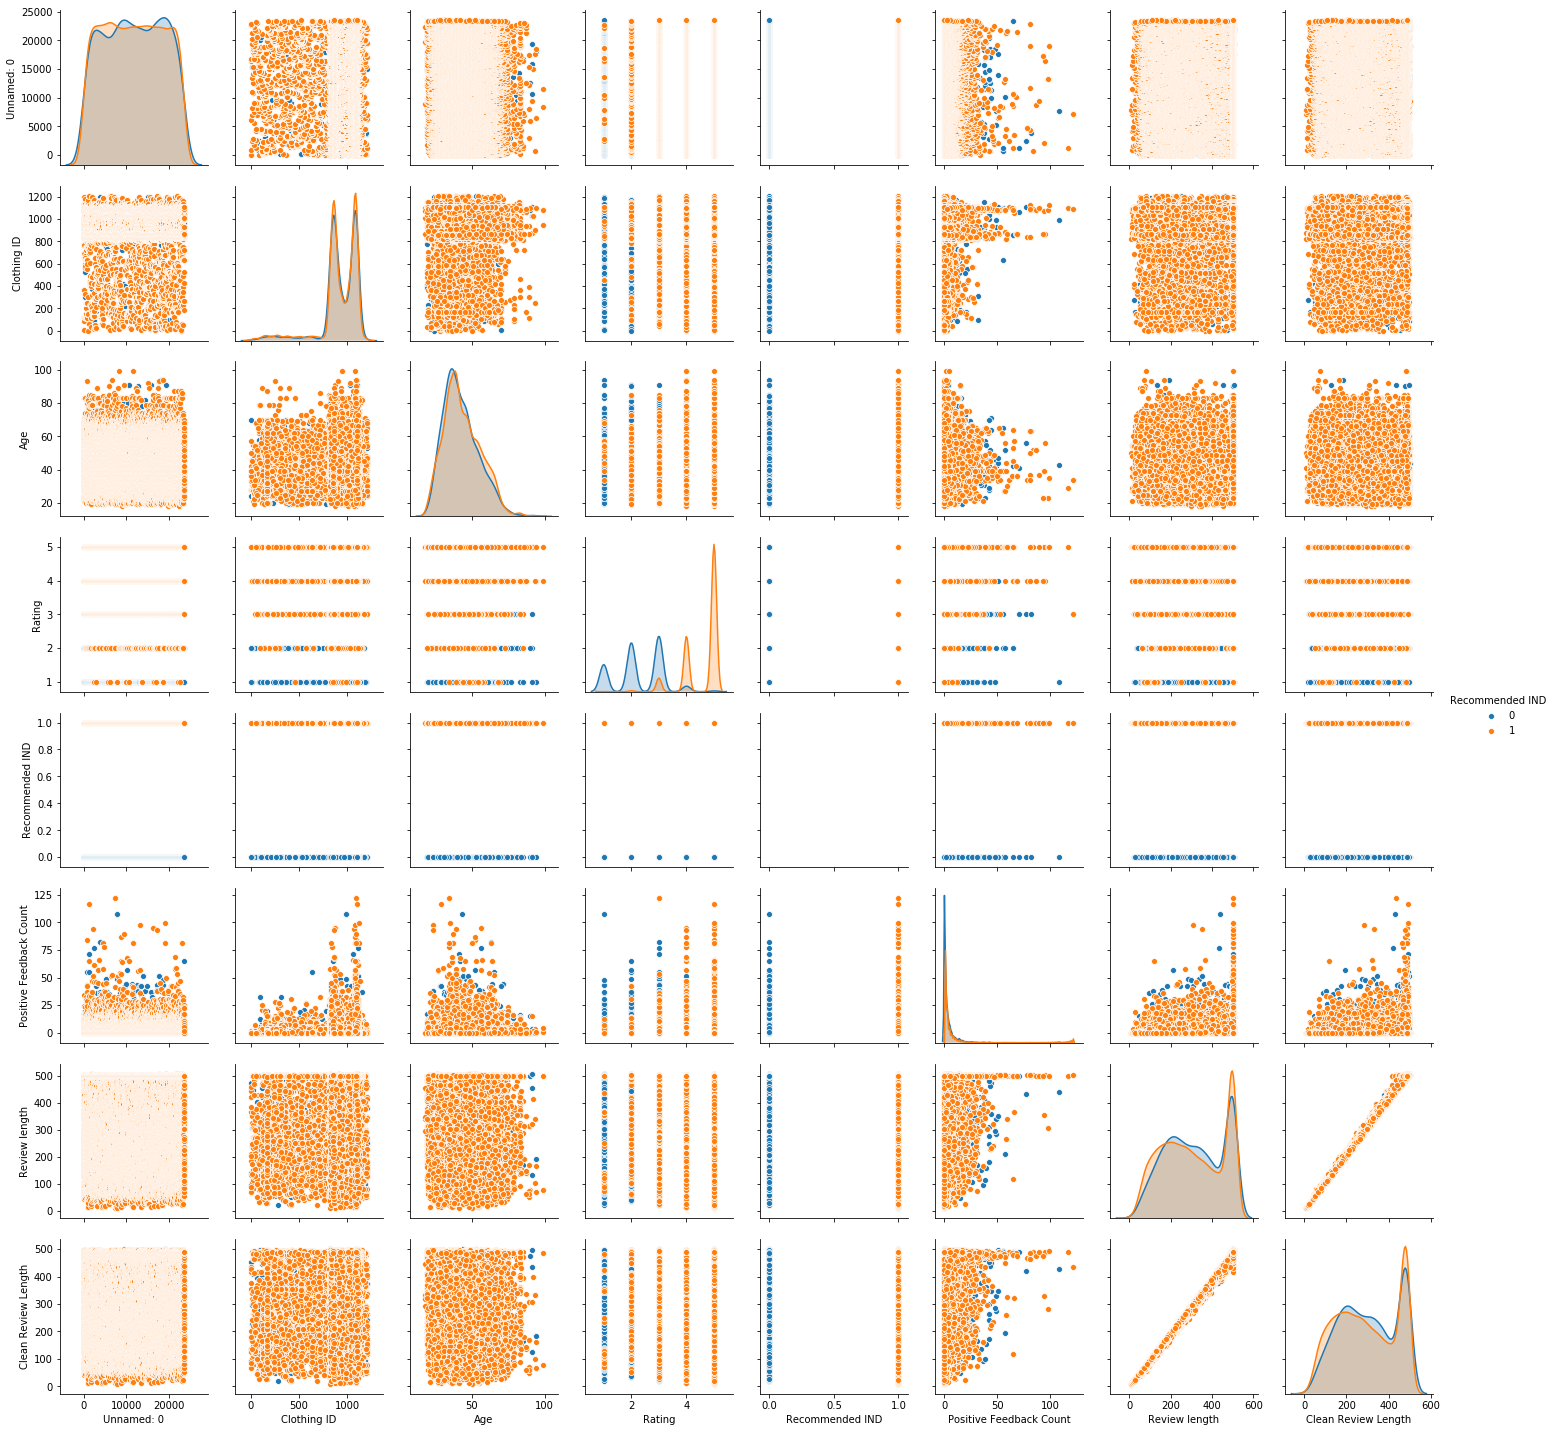

In [29]:
sns.pairplot(data, hue='Recommended IND')

#### as it is show that the orange color (recomended value) is dominan for the blue color (not recommended value). the thing is data need to be balanced and normalize to get good distribution data of our targer

In [30]:
data['Recommended IND'].value_counts(normalize=True)

1    0.818764
0    0.181236
Name: Recommended IND, dtype: float64

In [31]:
data['Recommended IND'].value_counts()

1    18527
0     4101
Name: Recommended IND, dtype: int64

#### the data target is imbalanced, it needs to be using sampling to get the balanced targe

### Export CSV Clean

In [34]:
data.to_csv('womens-clothing-clean.csv')